In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dictionary for validation losses / mAP
val_loss_dict = dict()
mAP_dict = dict()

In [8]:
#Define experiments dictionary
expr_dict = {
'original': 'log_sunrgbd_210124/log_train.txt', 
#'avg_pt_sampling': 'log_sunrgbd_210123/log_train.txt', 
#'random_sampling': 'log_sunrgbd_210214/log_train.txt', 
#'random_sampling_SA1FPS': 'log_sunrgbd_210215/log_train.txt',
#'avg_pt_sampling_8Q': 'log_sunrgbd_210201/log_train.txt', 
#'random_sampling_8Q_FPSVoting': 'log_sunrgbd_210131/log_train.txt', 
#'voxel_sampling': 'log_sunrgbd_210216/log_train.txt', 
#'SA1Voxel_Others_FPS': 'log_sunrgbd_210219/log_train.txt', 
#'inv_ball_query': 'log_sunrgbd_210126/log_train.txt',
#'All_applied': 'log_sunrgbd_210122/log_train.txt' 
    'tensorflow': 'log_sunrgbd_210809_tf/log_train.txt',
    'tensorflow2': 'log_sunrgbd_210817_tf/log_train.txt'
}


In [9]:
for expr, filename in expr_dict.items():
    #filename = expr_dict[expr]
    train_loss_epoch = []
    val_loss_epoch = []
    mAP_epoch = []

    epoch_set = set()
    with open(filename,'r') as log_file:
        lines = log_file.readlines()    
        sum_loss = 0
        cnt_loss = 0
        epoch = 0
        for line in lines:
            if line.startswith('****'):

                if line in epoch_set:
                    sum_loss = 0
                    cnt_loss = 0
                else:
                    epoch_set.add(line)
                    if cnt_loss > 0:
                        train_loss_epoch.append([epoch,sum_loss/cnt_loss])
                        sum_loss = 0
                        cnt_loss = 0
                    epoch += 1            


            if line.startswith('mean loss'):
                train_loss = float(line.split(':')[1].strip())
                sum_loss += train_loss
                cnt_loss += 1

            if line.startswith('eval mean loss'):            
                eval_loss = float(line.split(':')[1].strip())
                val_loss_epoch.append([epoch,eval_loss])


            if line.startswith('eval mAP'):
                mAP = float(line.split(':')[1].strip())
                mAP_epoch.append([epoch,mAP])
        train_loss_epoch.append([epoch,sum_loss/cnt_loss])

    train_loss_epoch = np.array(train_loss_epoch)
    val_loss_epoch = np.array(val_loss_epoch)
    mAP_epoch = np.array(mAP_epoch)
    val_loss_dict[expr] = val_loss_epoch
    mAP_dict[expr] = mAP_epoch

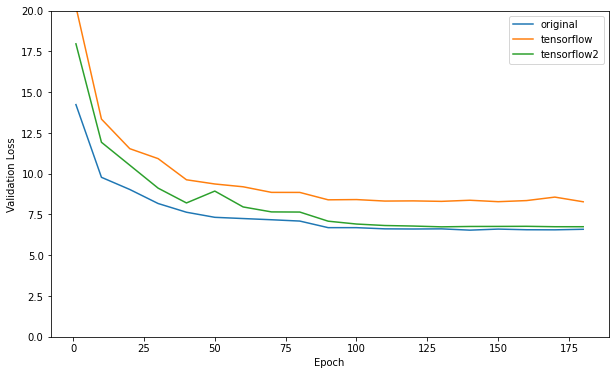

In [10]:
plt.figure(figsize=(10,6))
#plt.plot(train_loss_epoch[:,0],train_loss_epoch[:,1], label='training loss')
for key_expr in expr_dict.keys():
    #if key_expr == 'avg_pt_sampling_Q':
    #    continue
    plt.plot(val_loss_dict[key_expr][:19,0], val_loss_dict[key_expr][:19,1], label=key_expr)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim((0,20))
plt.legend(loc='upper right')

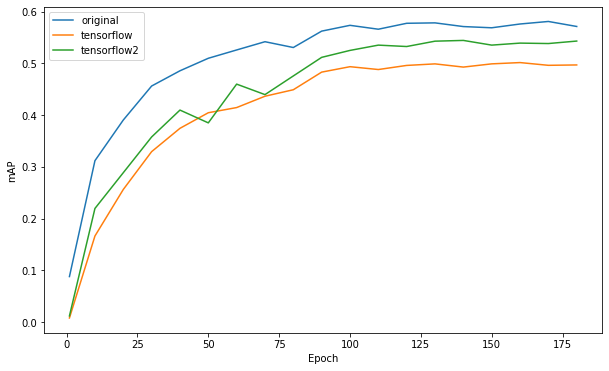

In [11]:
plt.figure(figsize=(10,6))
for key_expr in expr_dict.keys():
    #if key_expr == 'avg_pt_sampling_Q':
    #    continue
    plt.plot(mAP_dict[key_expr][:19,0], mAP_dict[key_expr][:19,1], label=key_expr)
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend(loc='upper left')

In [12]:
mAP_dict

{'original': array([[1.00000e+00, 8.78290e-02],
        [1.00000e+01, 3.11762e-01],
        [2.00000e+01, 3.90319e-01],
        [3.00000e+01, 4.56032e-01],
        [4.00000e+01, 4.85477e-01],
        [5.00000e+01, 5.09653e-01],
        [6.00000e+01, 5.25719e-01],
        [7.00000e+01, 5.41664e-01],
        [8.00000e+01, 5.30452e-01],
        [9.00000e+01, 5.62123e-01],
        [1.00000e+02, 5.73326e-01],
        [1.10000e+02, 5.65820e-01],
        [1.20000e+02, 5.77266e-01],
        [1.30000e+02, 5.78072e-01],
        [1.40000e+02, 5.70938e-01],
        [1.50000e+02, 5.68584e-01],
        [1.60000e+02, 5.75896e-01],
        [1.70000e+02, 5.80790e-01],
        [1.80000e+02, 5.71113e-01]]),
 'tensorflow': array([[1.00000e+00, 7.80300e-03],
        [1.00000e+01, 1.66230e-01],
        [2.00000e+01, 2.56112e-01],
        [3.00000e+01, 3.29234e-01],
        [4.00000e+01, 3.74305e-01],
        [5.00000e+01, 4.04418e-01],
        [6.00000e+01, 4.14405e-01],
        [7.00000e+01, 4.36301e-01],
